# Linear Regression Assignment :: Car Princing

   ### Developer Name :: Sachin Kumar
   ### Email ID :: sachinkumar.ml10@iiitb.net
   ### Roll Number :: DML1950087
   ### Date :: 02/10/2019 
   ### Version :: 0.5
   ### Ref :: Housing Case Study


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# To avoid plt.show()
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
# Use "low_memory = False" to avoid warning
carPrice=pd.read_csv("C:/Users/sachin.kumar/Desktop/python/Linear Regression Assignment/CarPrice_Assignment.csv",low_memory=False)
carPrice.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
carPrice.shape

(205, 26)

In [4]:
carPrice.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

# Problem Statement:
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.  

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

1. Which variables are significant in predicting the price of a car
2. How well those variables describe the price of a car

## Detailed information on column provided 

In [5]:
carPrice.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
#All rows 205 are unique
carPrice['car_ID'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [7]:
#Since there are many columns lets check the uniquness in one go...
carPrice.astype('object').describe(include='all').loc['unique', :]

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
Name: unique, dtype: object

### Check Columns for Dummy Variables

In [8]:
#It's assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 
carPrice['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [9]:
#Car fuel type i.e gas or diesel (Categorical)
carPrice['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [10]:
#Aspiration used in a car (Categorical)
carPrice['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [11]:
#Number of doors in a car (Categorical)
carPrice['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [12]:
#carPrice['carbody'].unique()
carPrice['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [13]:
#type of drive wheel (Categorical)
carPrice['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [14]:
#Location of car engine (Categorical)
carPrice['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [15]:
#Type of engine. (Categorical)
carPrice['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [16]:
#cylinder placed in the car (Categorical)
carPrice['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [17]:
#Fuel system of car (Categorical)
carPrice['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

## Given:
There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building. 

In [18]:
#Split & create a new column CompanyName
newCarDataFrame = carPrice['CarName'].str.split(" ", 1, expand=True)
newCarDataFrame

,0,1
0,alfa-romero,giulia
1,alfa-romero,stelvio
2,alfa-romero,Quadrifoglio
3,audi,100 ls
4,audi,100ls
5,audi,fox
6,audi,100ls
7,audi,5000
8,audi,4000
9,audi,5000s (diesel)


In [19]:
carPrice['CompanyName'] = newCarDataFrame[0]

In [20]:
carPrice.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000,audi
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000,audi
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000,audi
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000,audi
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000,audi
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167,audi


## Data Cleaning Process :

In [21]:
# Check the null values in data frame
total_Records = carPrice.isnull().sum().sort_values(ascending=False)
percent_Records = (carPrice.isnull().sum()/carPrice.count()).sort_values(ascending=False)
missing_data = pd.concat([total_Records, percent_Records], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
CompanyName,0,0.0
carheight,0,0.0
symboling,0,0.0
CarName,0,0.0
fueltype,0,0.0
aspiration,0,0.0
doornumber,0,0.0
carbody,0,0.0
drivewheel,0,0.0
enginelocation,0,0.0


### From Above we can see there is no Missing Values

In [22]:
#Drop Column "CarName" & "Car_ID" since there is no use of it for Multi-LinearRegression
carPrice.drop(columns=['car_ID','CarName'], inplace=True)
carPrice.shape

(205, 25)

In [23]:
carPrice['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

### There are some spelling errors in the car company Name. We have to fix it.
1. maxda & mazda
2. Nissan & nissan
3. porsche & porcshce
4. toyota & toyouta
5. vokswagen & volkswagen & vw

In [24]:
carPrice['CompanyName'].replace('maxda','mazda',inplace=True)
carPrice['CompanyName'].replace('Nissan','nissan',inplace=True)
carPrice['CompanyName'].replace('porcshce','porsche',inplace=True)
carPrice['CompanyName'].replace('toyouta','toyota',inplace=True)
carPrice['CompanyName'].replace('vokswagen','volkswagen',inplace=True)
carPrice['CompanyName'].replace('vw','volkswagen',inplace=True)

In [25]:
carPrice['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [26]:
# Check for duplicate Rows in the entire dataframe.
carPrice[carPrice.duplicated()]

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName


In [27]:
# Printing the column for verification.
carPrice.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'CompanyName'],
      dtype='object')

In [28]:
carPrice.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Data Preparation:

In [29]:
carPrice.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'CompanyName'],
      dtype='object')

In [30]:
#We can see doornumber column have values as two & four.We have to chnage it to Integer 2 & 4 respectively.
doorNumberMap={'two':2,'four':4}
carPrice['doornumber'].replace(doorNumberMap,inplace=True)
carPrice['doornumber'].unique()

array([2, 4], dtype=int64)

In [31]:
cylinderNumberMap = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
carPrice['cylindernumber'].replace(cylinderNumberMap,inplace=True)
carPrice['cylindernumber'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [32]:
carPrice.head(10)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000,alfa-romero
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000,alfa-romero
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000,alfa-romero
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000,audi
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000,audi
5,2,gas,std,2,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,5,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000,audi
6,1,gas,std,4,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,5,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000,audi
7,1,gas,std,4,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,5,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000,audi
8,1,gas,turbo,4,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,5,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000,audi
9,0,gas,turbo,2,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,5,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167,audi


## EDA : Visualising Categorical Variables

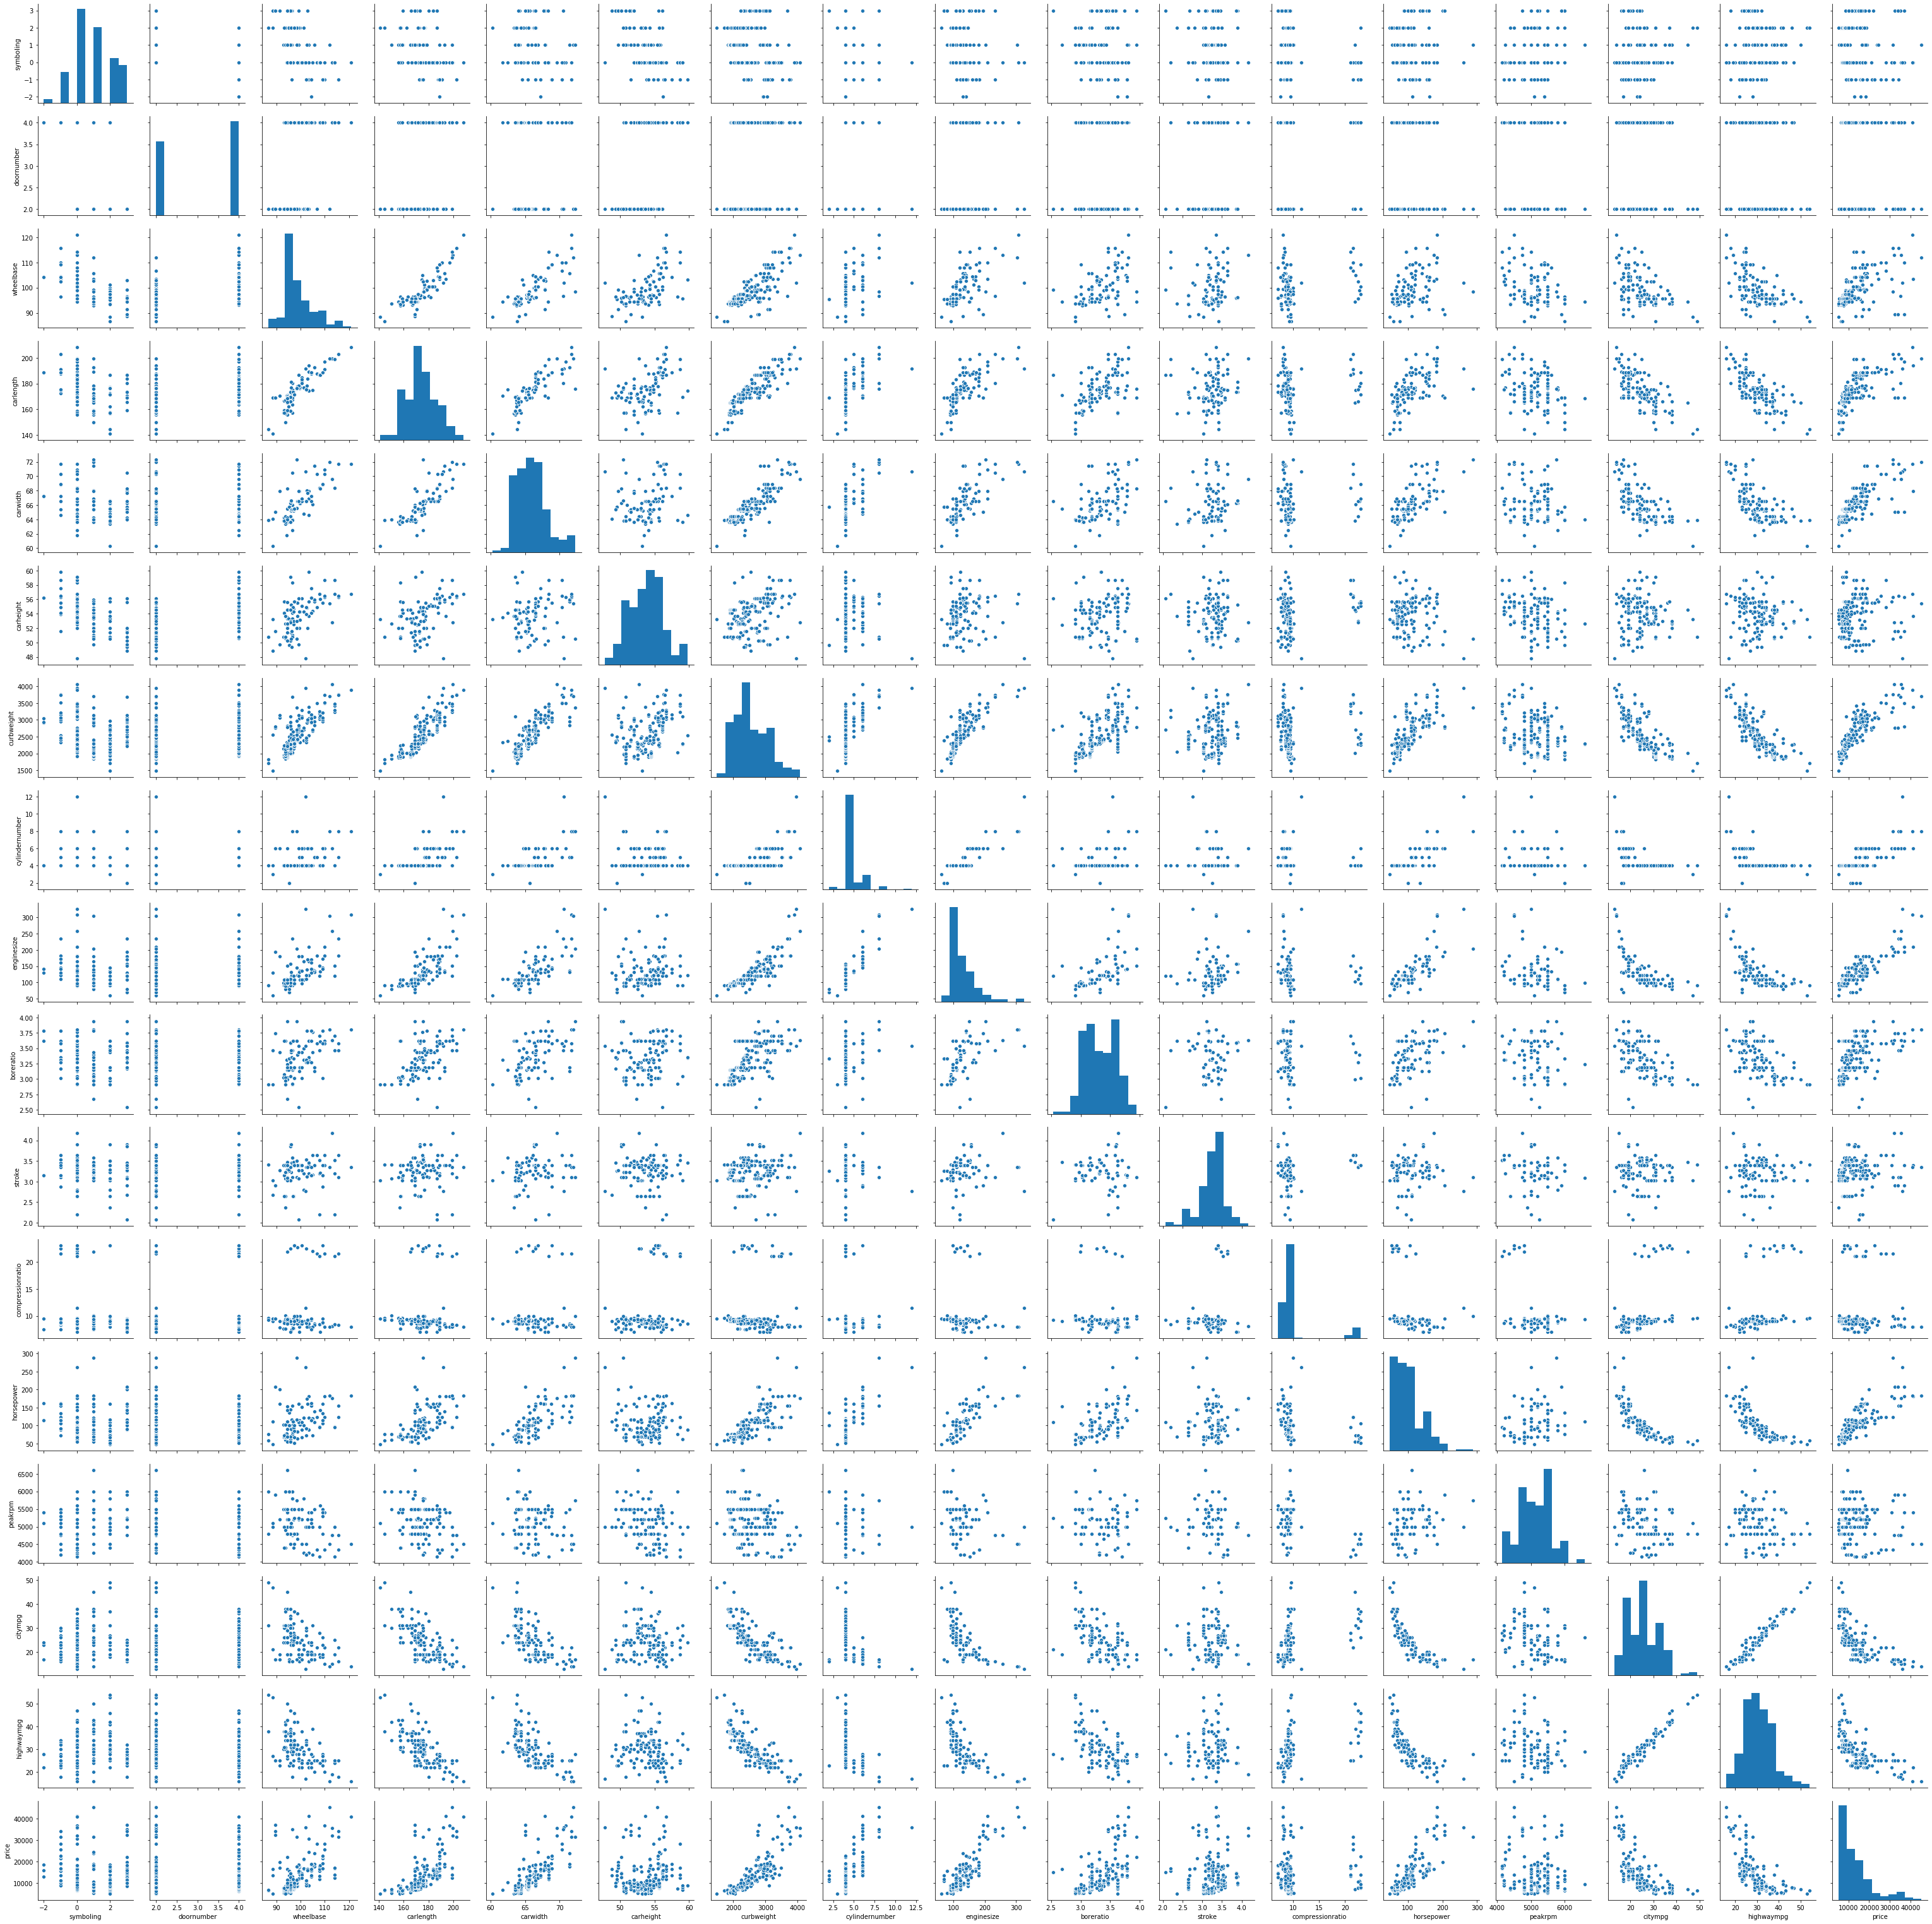

In [33]:
sns.pairplot(carPrice)

## Count & [Dependent Variable] i.e. Price vs Categorical Variable Visualization 

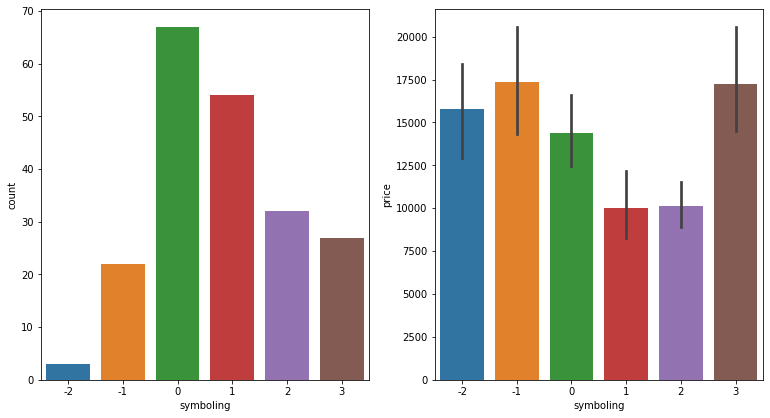

In [34]:
plt.figure(figsize=(20, 15))
plt.subplot(2,3,1)
sns.countplot(carPrice['symboling'], data = carPrice)
plt.subplot(2,3,2)
sns.barplot(x = 'symboling', y = 'price', data = carPrice)

### symboling 0 & 1 is most sold car. Symboling -1 has high price because of insurance risk rating is good.On the other hand 3 has high price but count is less i.e. people are not interested in that car.

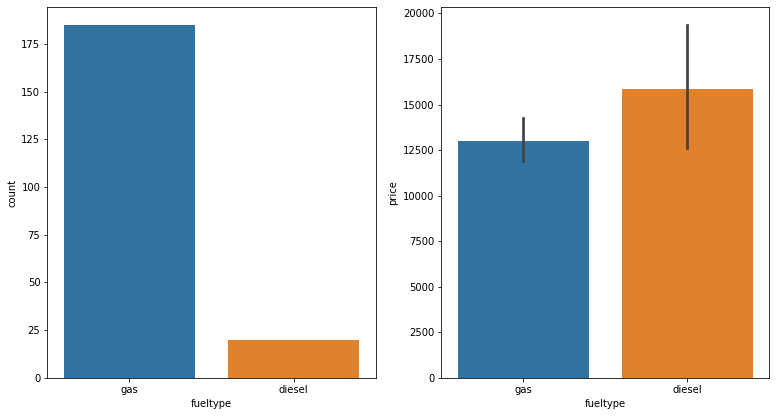

In [35]:
plt.figure(figsize=(20, 15))
plt.subplot(2,3,1)
sns.countplot(carPrice['fueltype'], data = carPrice)
plt.subplot(2,3,2)
sns.barplot(x = 'fueltype', y = 'price', data = carPrice)

### Diesel Car has hign price so count is less.

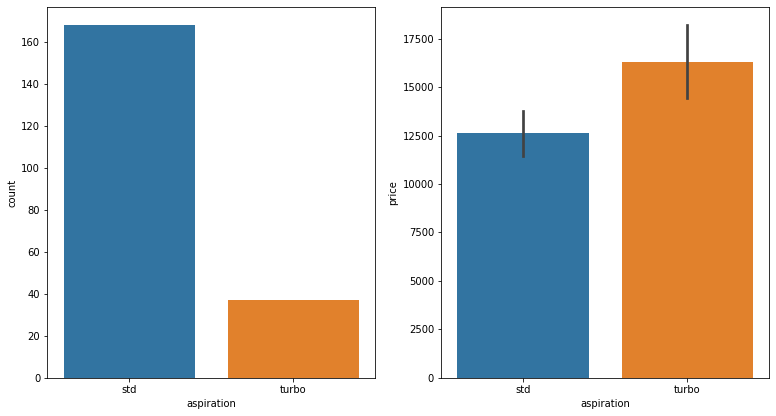

In [36]:
plt.figure(figsize=(20, 15))
plt.subplot(2,3,1)
sns.countplot(carPrice['aspiration'], data = carPrice)
plt.subplot(2,3,2)
sns.barplot(x = 'aspiration', y = 'price', data = carPrice)

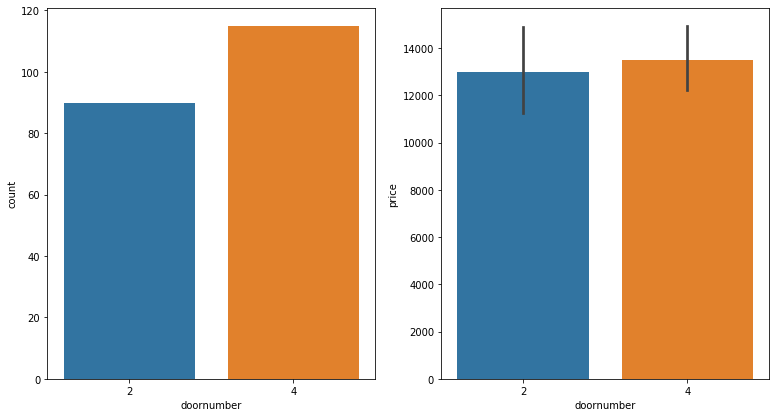

In [37]:
plt.figure(figsize=(20, 15))
plt.subplot(2,3,1)
sns.countplot(carPrice['doornumber'], data = carPrice)
plt.subplot(2,3,2)
sns.barplot(x = 'doornumber', y = 'price', data = carPrice)
#Door number 4 sold high & price is slightly high than 2 door number

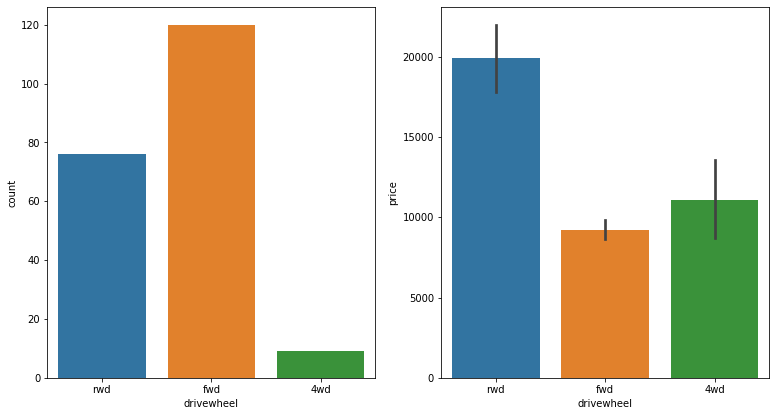

In [38]:
plt.figure(figsize=(20, 15))
plt.subplot(2,3,1)
sns.countplot(carPrice['drivewheel'], data = carPrice)
plt.subplot(2,3,2)
sns.barplot(x = 'drivewheel', y = 'price', data = carPrice)


### fwd drivewheel car sold high because of less price.

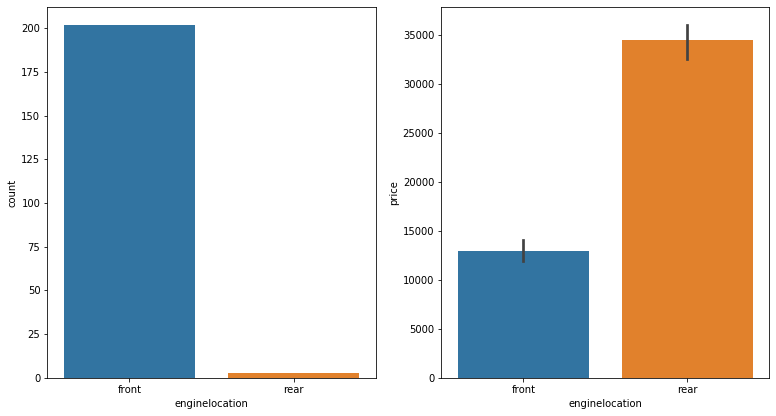

In [39]:
plt.figure(figsize=(20, 15))
plt.subplot(2,3,1)
sns.countplot(carPrice['enginelocation'], data = carPrice)
plt.subplot(2,3,2)
sns.barplot(x = 'enginelocation', y = 'price', data = carPrice)

### front engine location car sold comparitively high because of less price

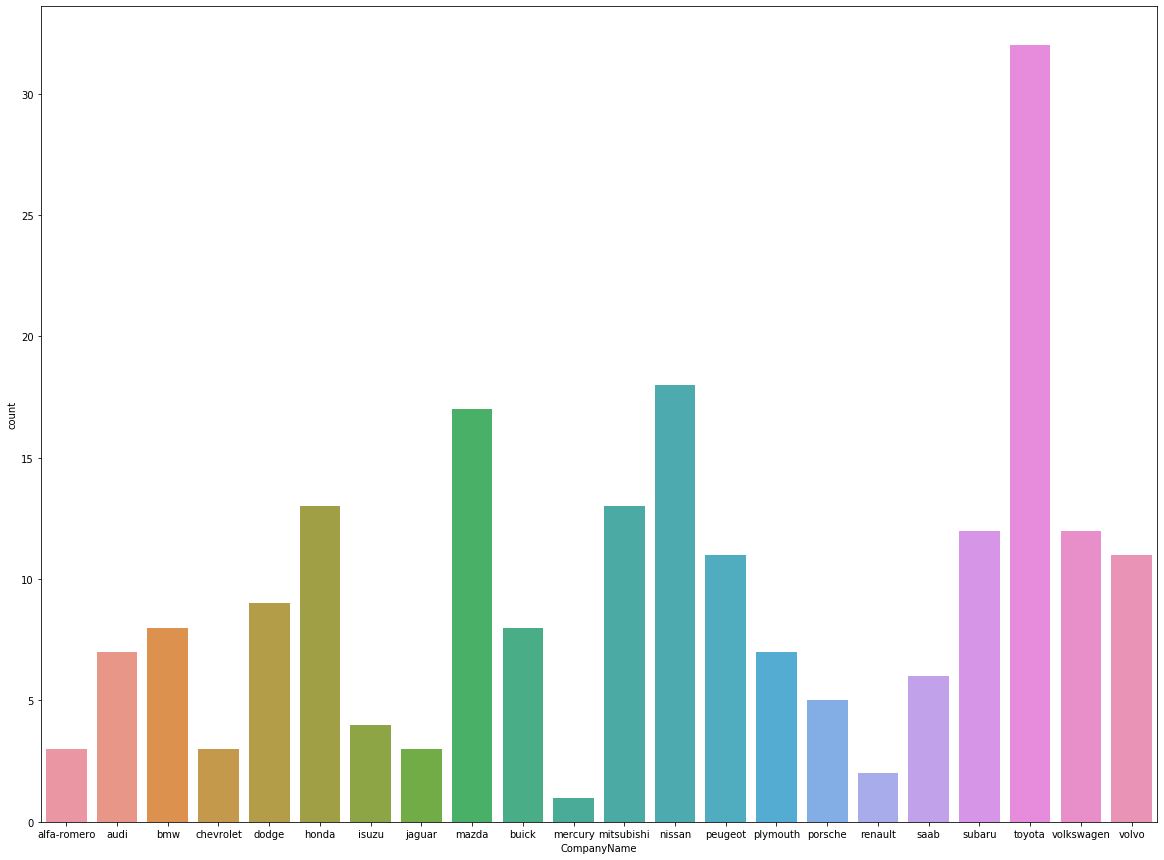

In [40]:
plt.figure(figsize=(20, 15))
sns.countplot(carPrice['CompanyName'], data = carPrice)
#Toyota is most favourate car

### Toyota is most favourate car

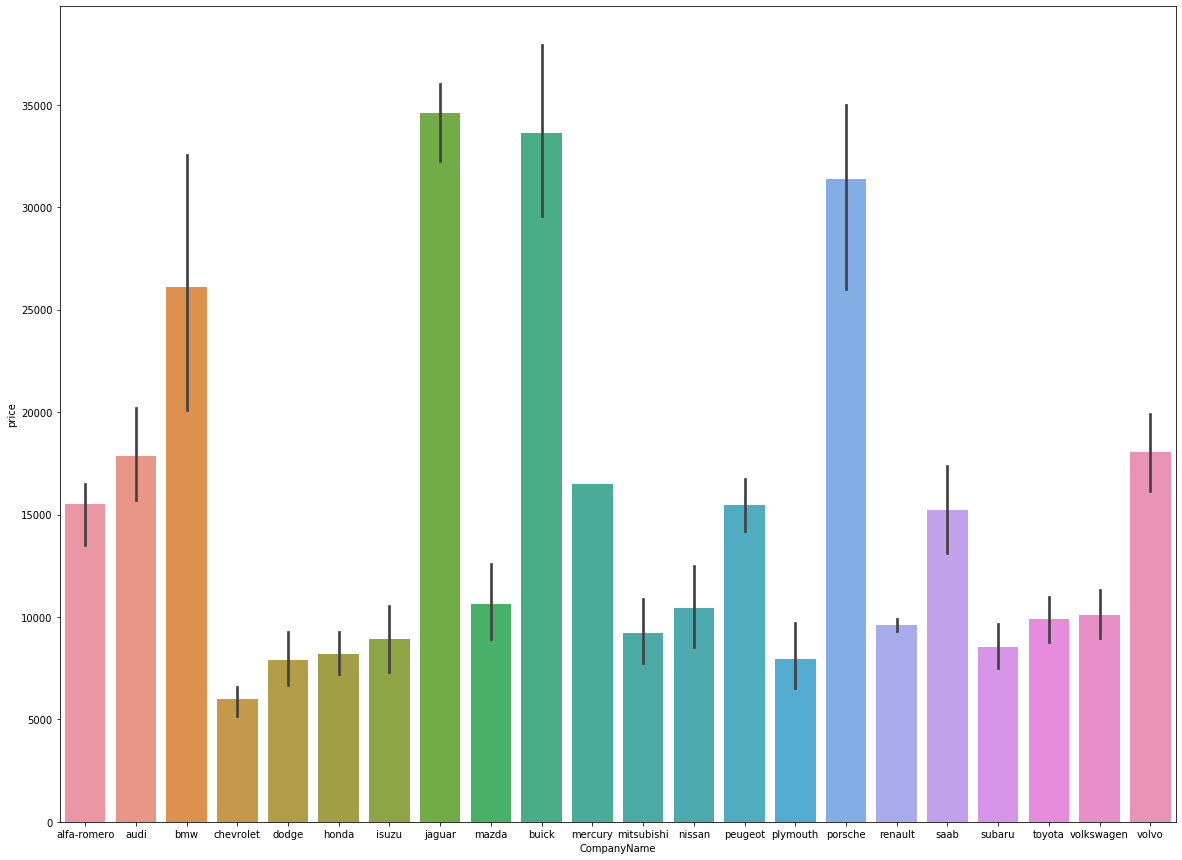

In [41]:
plt.figure(figsize=(20, 15))
sns.barplot(x = 'CompanyName', y = 'price', data = carPrice)

### jaguar price is high on the other hand Toyota is favourate because of price is less.

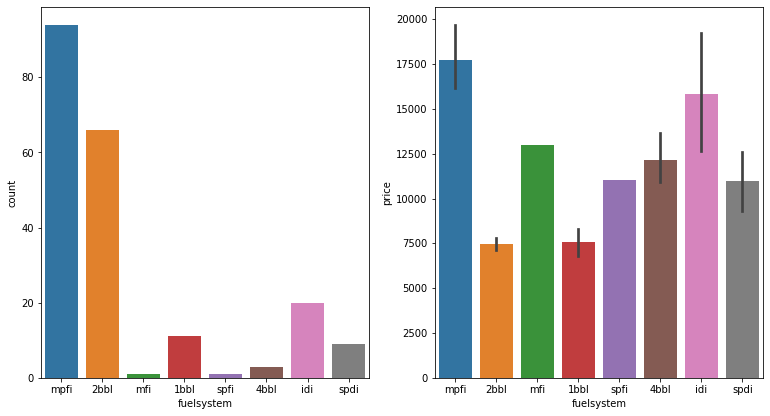

In [42]:
plt.figure(figsize=(20, 15))
plt.subplot(2,3,1)
sns.countplot(carPrice['fuelsystem'], data = carPrice)
plt.subplot(2,3,2)
sns.barplot(x = 'fuelsystem', y = 'price', data = carPrice)

### Fuelsystem "mpfi" both price & count is high

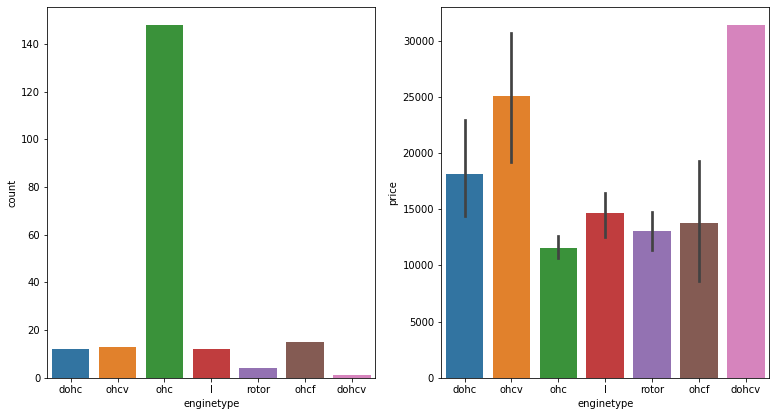

In [43]:
plt.figure(figsize=(20, 15))
plt.subplot(2,3,1)
sns.countplot(carPrice['enginetype'], data = carPrice)
plt.subplot(2,3,2)
sns.barplot(x = 'enginetype', y = 'price', data = carPrice)

### Enginetype ohc count is high because Price is less.

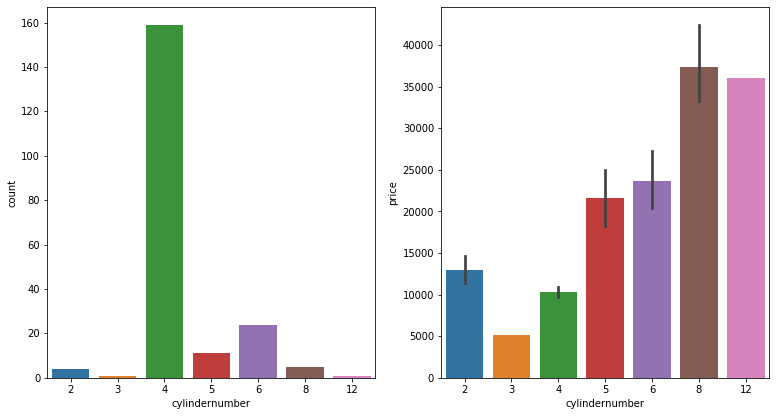

In [44]:
plt.figure(figsize=(20, 15))
plt.subplot(2,3,1)
sns.countplot(carPrice['cylindernumber'], data = carPrice)
plt.subplot(2,3,2)
sns.barplot(x = 'cylindernumber', y = 'price', data = carPrice)

### CylinderNumber 4  car sold max bacasue of less Price.

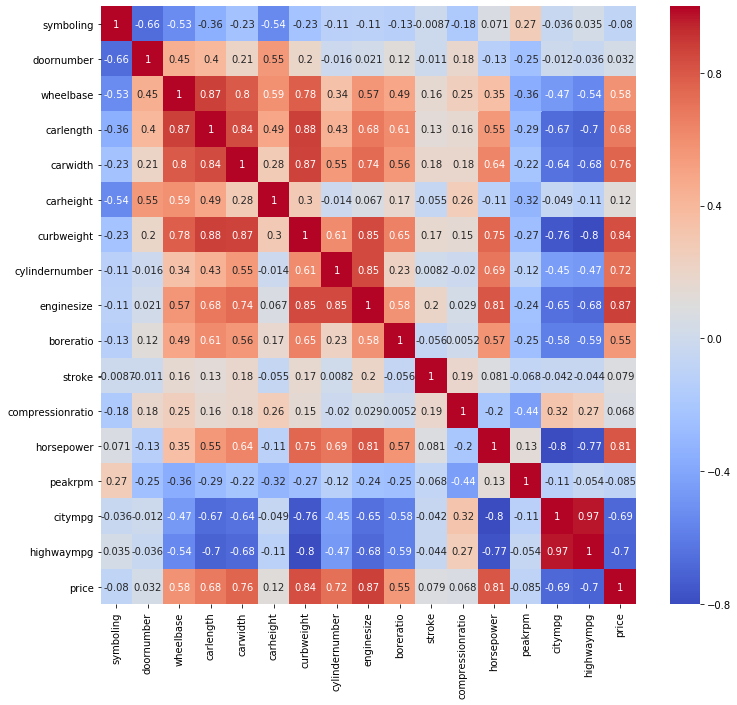

In [45]:
plt.figure(figsize=(12,11))
sns.heatmap(carPrice.corr(), annot=True,cmap='coolwarm')

### Highly correlated variables to price :
1. enginesize - 87%
2. curbweight - 84%
3. horsepower - 81%
4. carwidth - 76%
5. cylindernumber - 72%
6. carlength - 68%
7. wheelbase - 58%
8. boreratio - 55%

In [46]:
carPrice.head(10)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000,alfa-romero
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000,alfa-romero
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000,alfa-romero
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000,audi
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000,audi
5,2,gas,std,2,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,5,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000,audi
6,1,gas,std,4,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,5,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000,audi
7,1,gas,std,4,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,5,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000,audi
8,1,gas,turbo,4,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,5,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000,audi
9,0,gas,turbo,2,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,5,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167,audi


### Dummy columns - ['fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem','CompanyName']

In [47]:
# Let's drop the first column from FuelType df using 'drop_first = True' & concatanate with Master df

FuelType = pd.get_dummies(carPrice['fueltype'],drop_first = True)
FuelType.head(2)

,gas
0,1
1,1


In [48]:
# Add the results to the original housing dataframe

carPrice = pd.concat([carPrice, FuelType], axis = 1)
carPrice.head(2)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,gas
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1


In [49]:
# Drop 'fueltype' as we have already created the dummies for it.
carPrice.drop(['fueltype'], axis = 1, inplace = True)

In [50]:
Aspiration = pd.get_dummies(carPrice['aspiration'],drop_first = True)
carPrice = pd.concat([carPrice, Aspiration], axis = 1)
carPrice.head(2)

,symboling,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,gas,turbo
0,3,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1,0
1,3,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1,0


In [51]:
# Drop 'aspirtion' as we have already created the dummies for it.
carPrice.drop(['aspiration'], axis = 1, inplace = True)

In [52]:
CarBody = pd.get_dummies(carPrice['carbody'],drop_first = True)
carPrice = pd.concat([carPrice, CarBody], axis = 1)
carPrice.drop(['carbody'], axis = 1, inplace = True)
carPrice.head(2)

,symboling,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,gas,turbo,hardtop,hatchback,sedan,wagon
0,3,2,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1,0,0,0,0,0
1,3,2,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1,0,0,0,0,0


In [53]:
DriveWheel = pd.get_dummies(carPrice['drivewheel'],drop_first = True)
carPrice = pd.concat([carPrice, DriveWheel], axis = 1)
carPrice.drop(['drivewheel'], axis = 1, inplace = True)
carPrice.head(2)

,symboling,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd
0,3,2,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1,0,0,0,0,0,0,1
1,3,2,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1,0,0,0,0,0,0,1


In [54]:
EngLocation = pd.get_dummies(carPrice['enginelocation'],drop_first = True)
carPrice = pd.concat([carPrice, EngLocation], axis = 1)
carPrice.drop(['enginelocation'], axis = 1, inplace = True)
carPrice.head(2)

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear
0,3,2,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1,0,0,0,0,0,0,1,0
1,3,2,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1,0,0,0,0,0,0,1,0


In [55]:
EngType = pd.get_dummies(carPrice['enginetype'],drop_first = True)
carPrice = pd.concat([carPrice, EngType], axis = 1)
carPrice.drop(['enginetype'], axis = 1, inplace = True)
carPrice.head(2)

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [56]:
FuelSys = pd.get_dummies(carPrice['fuelsystem'],drop_first = True)
carPrice = pd.concat([carPrice, FuelSys], axis = 1)
carPrice.drop(['fuelsystem'], axis = 1, inplace = True)
carPrice.head(2)

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [57]:
CompName = pd.get_dummies(carPrice['CompanyName'],drop_first = True)
carPrice = pd.concat([carPrice, CompName], axis = 1)
carPrice.drop(['CompanyName'], axis = 1, inplace = True)
carPrice.head(2)

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
#Check the total columns
carPrice.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'gas', 'turbo', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'rwd', 'rear', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi',
       'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen',
       'volvo'],
      dtype='object')

In [59]:
carPrice.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 60 columns):
symboling           205 non-null int64
doornumber          205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
cylindernumber      205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
gas                 205 non-null uint8
turbo               205 non-null uint8
hardtop             205 non-null uint8
hatchback           205 non-null uint8
sedan               205 non-null uint8
wagon               2

## Splitting the Data into Training and Testing Sets

In [60]:
from sklearn.model_selection import train_test_split

# The train and test data set always have the same rows, respectively
np.random.seed(0)
carPrice_train, carPrice_test = train_test_split(carPrice, train_size=0.7, test_size=0.3, random_state=100)

In [61]:
carPrice_train.shape

(143, 60)

In [62]:
carPrice_test.shape

(62, 60)

# Rescaling the Features :

Two common ways of rescaling:
1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

Here we are using Min-Max scaling


In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
#Create the object if class
scaler = MinMaxScaler()

In [65]:
carPrice_train.head(10)

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,1,4,93.7,167.3,63.8,50.8,2191,4,98,2.97,3.23,9.4,68,5500,31,38,7609.0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
125,3,2,94.5,168.9,68.3,50.2,2778,4,151,3.94,3.11,9.5,143,5500,19,27,22018.0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
166,1,2,94.5,168.7,64.0,52.6,2300,4,98,3.24,3.08,9.4,112,6600,26,29,9538.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,-1,4,104.3,188.8,67.2,57.5,3157,4,130,3.62,3.15,7.5,162,5100,17,22,18950.0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
190,3,2,94.5,165.7,64.0,51.4,2221,4,109,3.19,3.40,8.5,90,5500,24,29,9980.0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
96,1,4,94.5,165.3,63.8,54.5,1971,4,97,3.15,3.29,9.4,69,5200,31,37,7499.0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
177,-1,4,102.4,175.6,66.5,53.9,2458,4,122,3.31,3.54,8.7,92,4200,27,32,11248.0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
181,-1,4,104.5,187.8,66.5,54.1,3151,6,161,3.27,3.35,9.2,156,5200,19,24,15750.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
97,1,4,94.5,170.2,63.8,53.5,2037,4,97,3.15,3.29,9.4,69,5200,31,37,7999.0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [66]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth','carheight','curbweight','cylindernumber','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']

carPrice_train[num_vars] = scaler.fit_transform(carPrice_train[num_vars])

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [67]:
carPrice_train.head(10)

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,0.6,1.0,0.244828,0.426016,0.291667,0.265487,0.272692,0.2,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,7609.0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
125,1.0,0.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.2,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,22018.0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
166,0.6,0.0,0.272414,0.448780,0.308333,0.424779,0.314973,0.2,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,9538.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1.0,0.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.2,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,16500.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,0.2,1.0,0.610345,0.775610,0.575000,0.858407,0.647401,0.2,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,18950.0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
190,1.0,0.0,0.272414,0.400000,0.308333,0.318584,0.284329,0.2,0.181132,0.404762,0.611111,0.09375,0.175000,0.551020,0.305556,0.324324,9980.0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
96,0.6,1.0,0.272414,0.393496,0.291667,0.592920,0.187355,0.2,0.135849,0.373016,0.555556,0.15000,0.087500,0.428571,0.500000,0.540541,7499.0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
177,0.2,1.0,0.544828,0.560976,0.516667,0.539823,0.376261,0.2,0.230189,0.500000,0.681818,0.10625,0.183333,0.020408,0.388889,0.405405,11248.0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
181,0.2,1.0,0.617241,0.759350,0.516667,0.557522,0.645074,0.4,0.377358,0.468254,0.585859,0.13750,0.450000,0.428571,0.166667,0.189189,15750.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
97,0.6,1.0,0.272414,0.473171,0.291667,0.504425,0.212956,0.2,0.135849,0.373016,0.555556,0.15000,0.087500,0.428571,0.500000,0.540541,7999.0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [68]:
carPrice_train.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.559441,0.411141,0.525476,0.461655,0.509004,0.407878,0.240559,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,13056.347322,0.909091,0.181818,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.034965,0.041958,0.034965,0.020979,0.041958,0.062937,0.020979,0.020979,0.090909,0.0,0.062937,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,0.239200,0.498199,0.205581,0.204848,0.184517,0.215378,0.211269,0.115818,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,7807.036883,0.288490,0.387050,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.184337,0.201198,0.184337,0.143818,0.201198,0.243703,0.143818,0.143818,0.288490,0.0,0.243703,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.200000,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,7554.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.200000,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,10198.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.200000,0.301887,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.527027,16465.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.0

## Dividing into X and Y sets for the model building:

In [69]:
y_train = carPrice_train.pop('price')
X_train = carPrice_train

In [70]:
print(y_train.shape)
print(X_train.shape)

(143,)
(143, 59)


## Building our model

Using RFE : Recursive feature elimination


In [71]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [72]:
lr = LinearRegression()

In [73]:
carPriceModel_1 = lr.fit(X_train, y_train)
carPriceModelRFE = RFE(carPriceModel_1, 20)
carPriceModelRFE = carPriceModelRFE.fit(X_train, y_train)

In [74]:
list(zip(X_train.columns, carPriceModelRFE.support_, carPriceModelRFE.ranking_))

[('symboling', False, 33),
 ('doornumber', False, 31),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 13),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', False, 8),
 ('peakrpm', True, 1),
 ('citympg', True, 1),
 ('highwaympg', False, 21),
 ('gas', True, 1),
 ('turbo', False, 10),
 ('hardtop', False, 5),
 ('hatchback', False, 2),
 ('sedan', False, 4),
 ('wagon', False, 3),
 ('fwd', False, 30),
 ('rwd', False, 32),
 ('rear', True, 1),
 ('dohcv', False, 9),
 ('l', True, 1),
 ('ohc', False, 16),
 ('ohcf', False, 7),
 ('ohcv', False, 37),
 ('rotor', True, 1),
 ('2bbl', False, 28),
 ('4bbl', False, 12),
 ('idi', True, 1),
 ('mfi', False, 38),
 ('mpfi', False, 35),
 ('spdi', False, 34),
 ('spfi', False, 40),
 ('audi', False, 23),
 ('bmw', True, 1),
 ('buick', False, 29),
 ('chevrolet', False, 17),
 ('dodge', False, 1

In [75]:
col = X_train.columns[carPriceModelRFE.support_]
col

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'peakrpm',
       'citympg', 'gas', 'rear', 'l', 'rotor', 'idi', 'bmw', 'peugeot',
       'porsche', 'saab'],
      dtype='object')

In [76]:
X_train.columns[~carPriceModelRFE.support_]

Index(['symboling', 'doornumber', 'carheight', 'horsepower', 'highwaympg',
       'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd',
       'dohcv', 'ohc', 'ohcf', 'ohcv', '2bbl', '4bbl', 'mfi', 'mpfi', 'spdi',
       'spfi', 'audi', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'plymouth',
       'renault', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics:

In [77]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [78]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)
X_train_lm.head(5)

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,peakrpm,citympg,gas,rear,l,rotor,idi,bmw,peugeot,porsche,saab
122,1.0,0.244828,0.426016,0.291667,0.272692,0.2,0.139623,0.230159,0.525253,0.15000,0.551020,0.500000,1,0,0,0,0,0,0,0,0
125,1.0,0.272414,0.452033,0.666667,0.500388,0.2,0.339623,1.000000,0.464646,0.15625,0.551020,0.166667,1,0,0,0,0,0,0,1,0
166,1.0,0.272414,0.448780,0.308333,0.314973,0.2,0.139623,0.444444,0.449495,0.15000,1.000000,0.361111,1,0,0,0,0,0,0,0,0
1,1.0,0.068966,0.450407,0.316667,0.411171,0.2,0.260377,0.626984,0.247475,0.12500,0.346939,0.222222,1,0,0,0,0,0,0,0,0
199,1.0,0.610345,0.775610,0.575000,0.647401,0.2,0.260377,0.746032,0.484848,0.03125,0.387755,0.111111,1,0,0,0,0,0,0,0,0


In [79]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [80]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     104.4
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           2.06e-66
Time:                        15:09:15   Log-Likelihood:                -1281.0
No. Observations:                 143   AIC:                             2602.
Df Residuals:                     123   BIC:                             2661.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             8810.6980   2709.559  

In [81]:
col.values

array(['wheelbase', 'carlength', 'carwidth', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'peakrpm', 'citympg', 'gas', 'rear', 'l',
       'rotor', 'idi', 'bmw', 'peugeot', 'porsche', 'saab'], dtype=object)

In [82]:
X_train_lm.head(5)

,const,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,peakrpm,citympg,gas,rear,l,rotor,idi,bmw,peugeot,porsche,saab
122,1.0,0.244828,0.426016,0.291667,0.272692,0.2,0.139623,0.230159,0.525253,0.15000,0.551020,0.500000,1,0,0,0,0,0,0,0,0
125,1.0,0.272414,0.452033,0.666667,0.500388,0.2,0.339623,1.000000,0.464646,0.15625,0.551020,0.166667,1,0,0,0,0,0,0,1,0
166,1.0,0.272414,0.448780,0.308333,0.314973,0.2,0.139623,0.444444,0.449495,0.15000,1.000000,0.361111,1,0,0,0,0,0,0,0,0
1,1.0,0.068966,0.450407,0.316667,0.411171,0.2,0.260377,0.626984,0.247475,0.12500,0.346939,0.222222,1,0,0,0,0,0,0,0,0
199,1.0,0.610345,0.775610,0.575000,0.647401,0.2,0.260377,0.746032,0.484848,0.03125,0.387755,0.111111,1,0,0,0,0,0,0,0,0


In [83]:
#Drop const to caculate the VIF values
X_train_new = X_train_lm.drop(['const'], axis=1)

In [84]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,gas,266.80
15,idi,124.56
8,compressionratio,83.34
5,enginesize,40.24
3,curbweight,21.52
4,cylindernumber,21.07
1,carlength,12.70
17,peugeot,10.62
13,l,10.06
10,citympg,8.39


## remove column "gas" as it has high VFI value and P Value

In [85]:
X_train_new = X_train_new.drop(['gas'], axis = 1)

In [86]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [87]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [88]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     104.4
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           2.06e-66
Time:                        15:09:18   Log-Likelihood:                -1281.0
No. Observations:                 143   AIC:                             2602.
Df Residuals:                     123   BIC:                             2661.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7023.6443   2903.915  

In [89]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,compressionratio,137.54
1,carlength,95.64
14,idi,93.25
3,curbweight,80.38
5,enginesize,71.57
2,carwidth,59.69
4,cylindernumber,57.68
0,wheelbase,37.90
7,stroke,24.41
6,boreratio,23.89


## ## remove column "citympg" as it has high VFI value and P Value

In [90]:
X_train_new = X_train_new.drop(['citympg'], axis = 1)

In [91]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [92]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()  

In [93]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     110.0
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           3.44e-67
Time:                        15:09:20   Log-Likelihood:                -1281.7
No. Observations:                 143   AIC:                             2601.
Df Residuals:                     124   BIC:                             2658.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             8904.4233   2324.976  

In [94]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,compressionratio,91.81
1,carlength,87.76
3,curbweight,78.73
13,idi,69.21
2,carwidth,59.63
5,enginesize,52.81
4,cylindernumber,48.46
0,wheelbase,37.51
6,boreratio,16.51
7,stroke,12.59


## remove column "compressionratio" as it has high VFI value and P Value


In [95]:
X_train_new = X_train_new.drop(['compressionratio'], axis = 1)

In [96]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()  
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     114.9
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           1.10e-67
Time:                        15:09:22   Log-Likelihood:                -1283.1
No. Observations:                 143   AIC:                             2602.
Df Residuals:                     125   BIC:                             2656.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           7538.1275   2174.440      3.

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [97]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carlength,82.90
3,curbweight,68.04
2,carwidth,55.61
5,enginesize,48.61
0,wheelbase,36.36
4,cylindernumber,25.74
6,boreratio,13.61
7,stroke,12.11
14,peugeot,10.42
10,l,9.62


## remove column "wheelbase" as it has high VFI value and P Value

In [98]:
X_train_new = X_train_new.drop(['wheelbase'], axis = 1)

In [99]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()  
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     121.5
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           2.04e-68
Time:                        15:09:23   Log-Likelihood:                -1284.0
No. Observations:                 143   AIC:                             2602.
Df Residuals:                     126   BIC:                             2652.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           7647.2599   2176.789      3.

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [100]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,67.78
0,carlength,62.99
1,carwidth,50.54
4,enginesize,48.57
3,cylindernumber,25.40
5,boreratio,13.13
6,stroke,12.11
13,peugeot,10.41
7,peakrpm,9.54
9,l,9.50


## remove column "rotor" as it has high P Value

In [101]:
X_train_new = X_train_new.drop(['rotor'], axis = 1)

In [102]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()  
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     127.8
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           6.24e-69
Time:                        15:09:24   Log-Likelihood:                -1285.4
No. Observations:                 143   AIC:                             2603.
Df Residuals:                     127   BIC:                             2650.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           8169.2462   2165.543      3.

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [103]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,63.71
0,carlength,60.91
1,carwidth,49.31
4,enginesize,48.28
3,cylindernumber,22.70
5,boreratio,13.10
6,stroke,12.03
12,peugeot,10.35
9,l,9.50
7,peakrpm,8.67


## remove column "saab" as it has high P Value 

In [104]:
X_train_new = X_train_new.drop(['saab'], axis = 1)

In [105]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()  
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     134.8
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           2.12e-69
Time:                        15:09:25   Log-Likelihood:                -1287.0
No. Observations:                 143   AIC:                             2604.
Df Residuals:                     128   BIC:                             2648.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           7819.3169   2170.958      3.

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [106]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,63.70
0,carlength,58.01
1,carwidth,48.68
4,enginesize,48.28
3,cylindernumber,22.59
5,boreratio,13.10
6,stroke,11.75
12,peugeot,10.30
9,l,9.50
7,peakrpm,8.62


## remove column "curbweight" as it has high VIF Value 

In [107]:
X_train_new = X_train_new.drop(['curbweight'], axis = 1)

In [108]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()  
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     123.1
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           5.12e-66
Time:                        15:09:26   Log-Likelihood:                -1298.5
No. Observations:                 143   AIC:                             2625.
Df Residuals:                     129   BIC:                             2666.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.016e+04   2281.898      4.

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [109]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,46.17
0,carlength,43.94
3,enginesize,25.34
2,cylindernumber,19.99
4,boreratio,12.92
5,stroke,11.14
11,peugeot,10.29
8,l,9.46
6,peakrpm,8.27
12,porsche,2.26


## remove column "carlength" as it has high VIF Value & P-value

In [110]:
X_train_new = X_train_new.drop(['carlength'], axis = 1)

In [111]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()  
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     134.4
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           4.37e-67
Time:                        15:09:28   Log-Likelihood:                -1298.5
No. Observations:                 143   AIC:                             2623.
Df Residuals:                     130   BIC:                             2661.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.02e+04   2259.358      4.

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [112]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,26.66
2,enginesize,25.32
1,cylindernumber,19.97
4,stroke,10.91
3,boreratio,10.26
10,peugeot,10.12
7,l,9.41
5,peakrpm,8.25
8,idi,1.89
11,porsche,1.71


## drop carwidth as having high VIF

In [113]:
X_train_new = X_train_new.drop(['carwidth'], axis = 1)

In [114]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()  
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     75.16
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           4.57e-51
Time:                        15:09:31   Log-Likelihood:                -1341.8
No. Observations:                 143   AIC:                             2708.
Df Residuals:                     131   BIC:                             2743.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.015e+04   3047.835      3.

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [115]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,22.25
0,cylindernumber,19.65
3,stroke,10.44
9,peugeot,9.56
6,l,9.18
2,boreratio,8.20
4,peakrpm,7.65
7,idi,1.76
10,porsche,1.70
5,rear,1.54


## droping rear as having high p-value 

In [116]:
X_train_new = X_train_new.drop(['rear'], axis = 1)

In [117]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()  
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     83.28
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           4.96e-52
Time:                        15:09:34   Log-Likelihood:                -1341.9
No. Observations:                 143   AIC:                             2706.
Df Residuals:                     132   BIC:                             2738.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           9985.8027   2914.812      3.

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [118]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,21.86
0,cylindernumber,19.47
3,stroke,10.38
8,peugeot,9.56
5,l,9.18
2,boreratio,8.12
4,peakrpm,7.52
6,idi,1.76
9,porsche,1.22
7,bmw,1.14


## Droping I since it has high P-value & high VIF

In [119]:
X_train_new = X_train_new.drop(['l'], axis = 1)

In [120]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()  
#Let's see the summary of our linear model
print(lm.summary())

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     92.93
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           6.01e-53
Time:                        15:09:35   Log-Likelihood:                -1342.1
No. Observations:                 143   AIC:                             2704.
Df Residuals:                     133   BIC:                             2734.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.031e+04   2860.162      3.

In [121]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,21.64
0,cylindernumber,19.38
3,stroke,10.33
2,boreratio,8.12
4,peakrpm,7.52
5,idi,1.76
7,peugeot,1.33
8,porsche,1.22
6,bmw,1.14


## drop peugeot because of high P-Value

In [122]:
X_train_new = X_train_new.drop(['peugeot'], axis = 1)

In [123]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()  
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     104.8
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           7.70e-54
Time:                        15:09:37   Log-Likelihood:                -1342.4
No. Observations:                 143   AIC:                             2703.
Df Residuals:                     134   BIC:                             2729.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.011e+04   2844.662      3.

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [124]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,21.59
0,cylindernumber,19.17
3,stroke,10.26
2,boreratio,7.61
4,peakrpm,7.52
5,idi,1.63
7,porsche,1.21
6,bmw,1.14


## Although enginesize has high VIF but we have seen that enginesize is highly correlated with Price with correlation of - 87% So we can not drop is we will drop cylindernumber 

In [125]:
X_train_new = X_train_new.drop(['cylindernumber'], axis = 1)

In [126]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()  
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     102.7
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           6.66e-51
Time:                        15:09:38   Log-Likelihood:                -1352.2
No. Observations:                 143   AIC:                             2720.
Df Residuals:                     135   BIC:                             2744.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -744.5628   1549.787     -0.480      0.6

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [127]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,stroke,10.26
1,boreratio,7.14
0,enginesize,6.15
3,peakrpm,6.06
4,idi,1.63
6,porsche,1.21
5,bmw,1.13


## Drop stroke since has high VIF

In [128]:
X_train_new = X_train_new.drop(['stroke'], axis = 1)

In [129]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()  
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     118.9
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           1.37e-51
Time:                        15:09:39   Log-Likelihood:                -1353.1
No. Observations:                 143   AIC:                             2720.
Df Residuals:                     136   BIC:                             2741.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2027.2561   1208.458     -1.678      0.0

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [130]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,boreratio,6.98
0,enginesize,5.11
2,peakrpm,2.92
3,idi,1.31
4,bmw,1.13
5,porsche,1.09


## Drop boreratio since has high VIF

In [131]:
X_train_new = X_train_new.drop(['boreratio'], axis = 1)

In [132]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()  
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     139.2
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           6.62e-52
Time:                        15:09:40   Log-Likelihood:                -1355.0
No. Observations:                 143   AIC:                             2722.
Df Residuals:                     137   BIC:                             2740.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -622.9649    968.632     -0.643      0.5

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [133]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,2.58
1,peakrpm,2.08
2,idi,1.22
3,bmw,1.13
4,porsche,1.07


## Residual Analysis of the train data

In [134]:
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

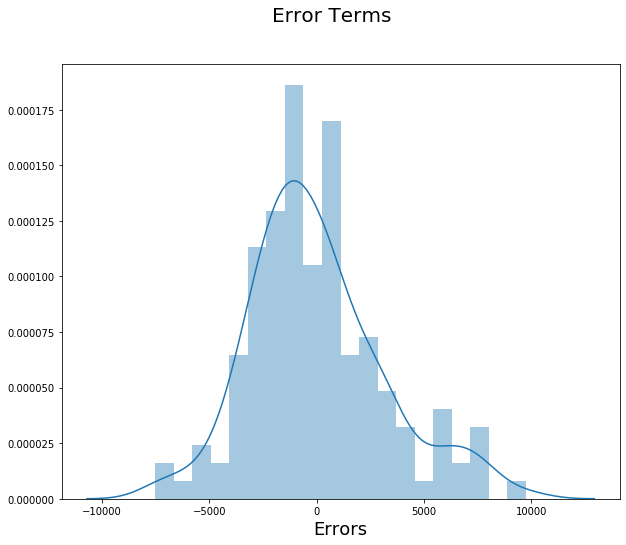

In [135]:
# Plot the histogram of the error terms

fig = plt.figure(figsize =(10,8))
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

## Here we can see error terms are normally distributed.

In [136]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables on test dataframe.
num_vars = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth','carheight','curbweight','cylindernumber','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']

carPrice_test[num_vars] = scaler.fit_transform(carPrice_test[num_vars])

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [137]:
carPrice_test.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.583871,0.564516,0.370121,0.486741,0.375212,0.454249,0.371743,0.080645,0.228835,0.667691,0.654504,0.209375,0.359521,0.393351,0.450941,0.466701,13784.967742,0.887097,0.177419,0.080645,0.338710,0.451613,0.096774,0.564516,0.419355,0.032258,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129,0.032258,0.032258,0.048387,0.0,0.048387,0.064516,0.016129,0.0,0.064516,0.016129,0.064516,0.064516,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645
std,0.271724,0.499868,0.179970,0.183964,0.208977,0.234487,0.222354,0.220721,0.188416,0.228484,0.173913,0.273690,0.252970,0.192092,0.258014,0.217041,8436.653035,0.319058,0.385142,0.274512,0.477134,0.501716,0.298064,0.499868,0.497482,0.178127,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000,0.178127,0.178127,0.216335,0.0,0.216335,0.247676,0.127000,0.0,0.247676,0.127000,0.247676,0.247676,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5399.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.265306,0.389764,0.221053,0.264423,0.219125,0.000000,0.126638,0.515873,0.590164,0.093750,0.140323,0.265306,0.208333,0.290323,8460.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,1.000000,0.327988,0.475591,0.326316,0.485577,0.344065,0.000000,0.183406,0.674603,0.699454,0.125000,0.312903,0.346939,0.416667,0.451613,10873.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.800000,1.000000,0.482507,0.642126,0.421053,0.605769,0.540726,0.000000,0.287118,0.857143,0.759563,0.150000,0.432258,0.540816,0.625000,0.580645,16601.250000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.

In [138]:
y_test = carPrice_test.pop('price')
X_test = carPrice_test

In [139]:
print(y_test.shape)
print(X_test.shape)

(62,)
(62, 59)


In [140]:
#X_train_rfe.head(5)
X_train_rfe.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'peakrpm',
       'citympg', 'gas', 'rear', 'l', 'rotor', 'idi', 'bmw', 'peugeot',
       'porsche', 'saab'],
      dtype='object')

In [141]:
#drop the const.
# Now let's use our model to make predictions.
X_train_final = X_train_lm.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_final = X_test[X_train_final.columns]

# Adding a constant variable 
X_test_final = sm.add_constant(X_test_final)

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [142]:
# Making predictions
y_pred = lm.predict(X_test_final)

In [143]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8326234421078207

Text(0, 0.5, 'y_pred')

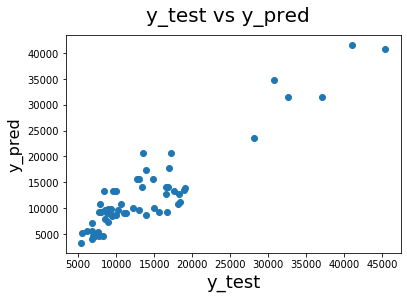

In [144]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

# Below are the variables that influence Price of a car:
 1. enginesize : size of an engine
 2. peakrpm : car peak rpm
 3. idi : Type of fuelsystem
 4. bmw : CarName
 5. prosche : CarName
 
# R-squared score :: 0.83